In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [15]:
ad_data=pd.read_csv('Social_Network_Ads.csv')
ad_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [16]:
#Checking for any null values
ad_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [17]:
ad_data['Gender'].replace(['Male','Female'],[1,0],inplace = True)

In [18]:
ad_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [5]:
#Splitting dataset into dependent and independent variables
#Eliminating User ID and Gender as they would not have any impact
X=ad_data[['Age','EstimatedSalary']]
y=ad_data['Purchased']

In [7]:
#Splitting dataset into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [19]:
lr_ad=LogisticRegression()
lr_ad.fit(X_train,y_train)

LogisticRegression()

In [20]:
y_pred=lr_ad.predict(X_test)

In [21]:
print('Accuracy: ',accuracy_score(y_test,y_pred))

Accuracy:  0.9125


In [22]:
print(lr_ad.intercept_ )
print(lr_ad.coef_ )

[-11.29770946]
[[2.09981977e-01 3.37789456e-05]]


In [23]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [24]:
proba = lr_ad.predict_proba(X_test)
proba

array([[0.88690221, 0.11309779],
       [0.83609388, 0.16390612],
       [0.8045407 , 0.1954593 ],
       [0.91130818, 0.08869182],
       [0.90545768, 0.09454232],
       [0.99298467, 0.00701533],
       [0.98636766, 0.01363234],
       [0.2449352 , 0.7550648 ],
       [0.99462745, 0.00537255],
       [0.49401576, 0.50598424],
       [0.96587756, 0.03412244],
       [0.97235758, 0.02764242],
       [0.84164705, 0.15835295],
       [0.62420465, 0.37579535],
       [0.98512491, 0.01487509],
       [0.65161588, 0.34838412],
       [0.716547  , 0.283453  ],
       [0.98830513, 0.01169487],
       [0.00954108, 0.99045892],
       [0.96102962, 0.03897038],
       [0.91378332, 0.08621668],
       [0.03120086, 0.96879914],
       [0.72426602, 0.27573398],
       [0.10733728, 0.89266272],
       [0.99601932, 0.00398068],
       [0.0228824 , 0.9771176 ],
       [0.92268828, 0.07731172],
       [0.92455555, 0.07544445],
       [0.80753649, 0.19246351],
       [0.84201489, 0.15798511],
       [0.

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [26]:
print(metrics.accuracy_score(y_pred,y_test)) # to check the accuracy

0.9125


In [33]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[56,  2],
       [ 5, 17]], dtype=int64)

In [29]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80



In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

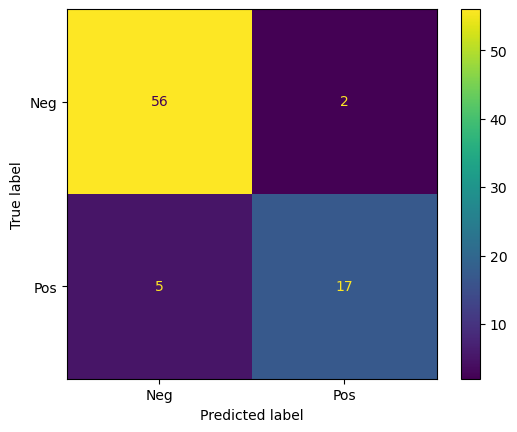

In [34]:
disp = ConfusionMatrixDisplay(cm,display_labels=["Neg","Pos"])
disp.plot()
plt.show()